In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/home/alpha/2410/2410-machine-learning/data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print('Total Missing Values:', df.isnull().sum().sum())
print('Total Duplicated Values:', df.duplicated().sum())

Total Missing Values: 0
Total Duplicated Values: 0


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

# Statistical Summary

In [6]:
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
des_stats = pd.DataFrame() # Create an empty DataFrame


# Central Tendency
des_stats['mean'] = df.mean() # Get the mean of each column
des_stats['median'] = df.median() # Get the median of each column
des_stats['mode'] = df.mode().loc[0] # Get the mode of each column

# Dispersion
des_stats['range'] = [np.ptp(df[i]) for i in df.columns]
des_stats['std'] = df.std() # Get the standard deviation of each column
des_stats['variance'] = df.var() # Get the variance of each column
des_stats['skewness'] = df.skew() # Get the skewness of each column
des_stats['kurtosis'] = df.kurtosis() # Get the kurtosis of each column
des_stats['iqr'] = df.quantile(0.75) - df.quantile(0.25) # Get the interquartile range of each column
des_stats['25%'] = df.quantile(0.25) # Get the 25th percentile of each column
des_stats['50%'] = df.quantile(0.50) # Get the 50th percentile of each column
des_stats['75%'] = df.quantile(0.75) # Get the 75th percentile of each column

des_stats.T.round(2)


,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
median,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
mode,1.00,99.00,70.00,0.00,0.00,32.00,0.25,22.00,0.00
range,17.00,199.00,122.00,99.00,846.00,67.10,2.34,60.00,1.00
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
variance,11.35,1022.25,374.65,254.47,13281.18,62.16,0.11,138.30,0.23
skewness,0.90,0.17,-1.84,0.11,2.27,-0.43,1.92,1.13,0.64
kurtosis,0.16,0.64,5.18,-0.52,7.21,3.29,5.59,0.64,-1.60
iqr,5.00,41.25,18.00,32.00,127.25,9.30,0.38,17.00,1.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00


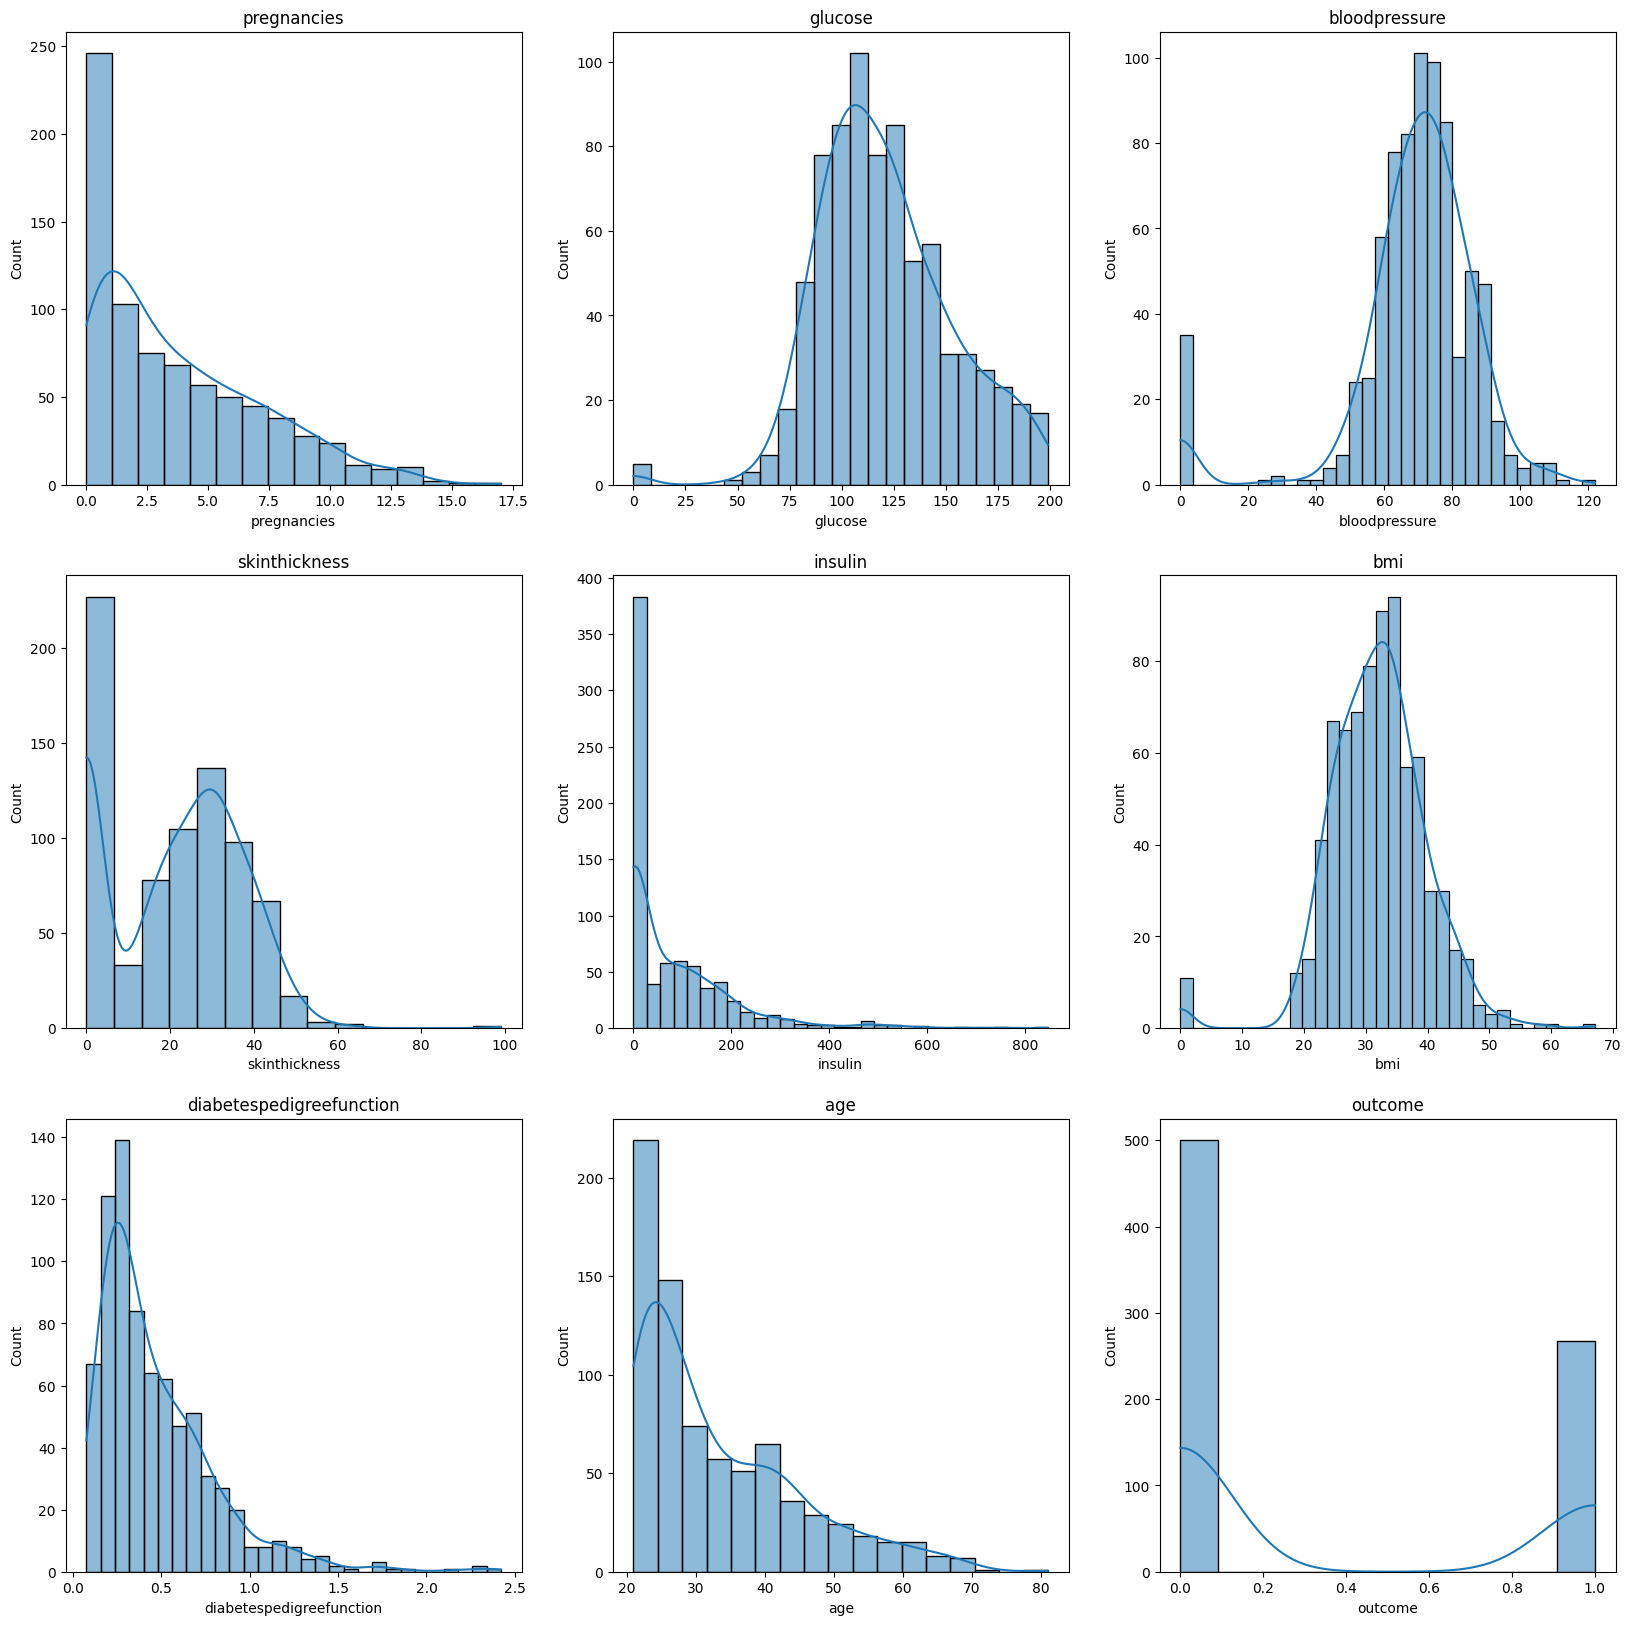

In [8]:
# Plotting the distribution of the data
plt.figure(figsize=(20, 20)) # taking a canvas of 20*20 pixels
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i+1) # vertical 3 and horizontal 3
    sns.histplot(df[col], kde=True)
    plt.title(col)

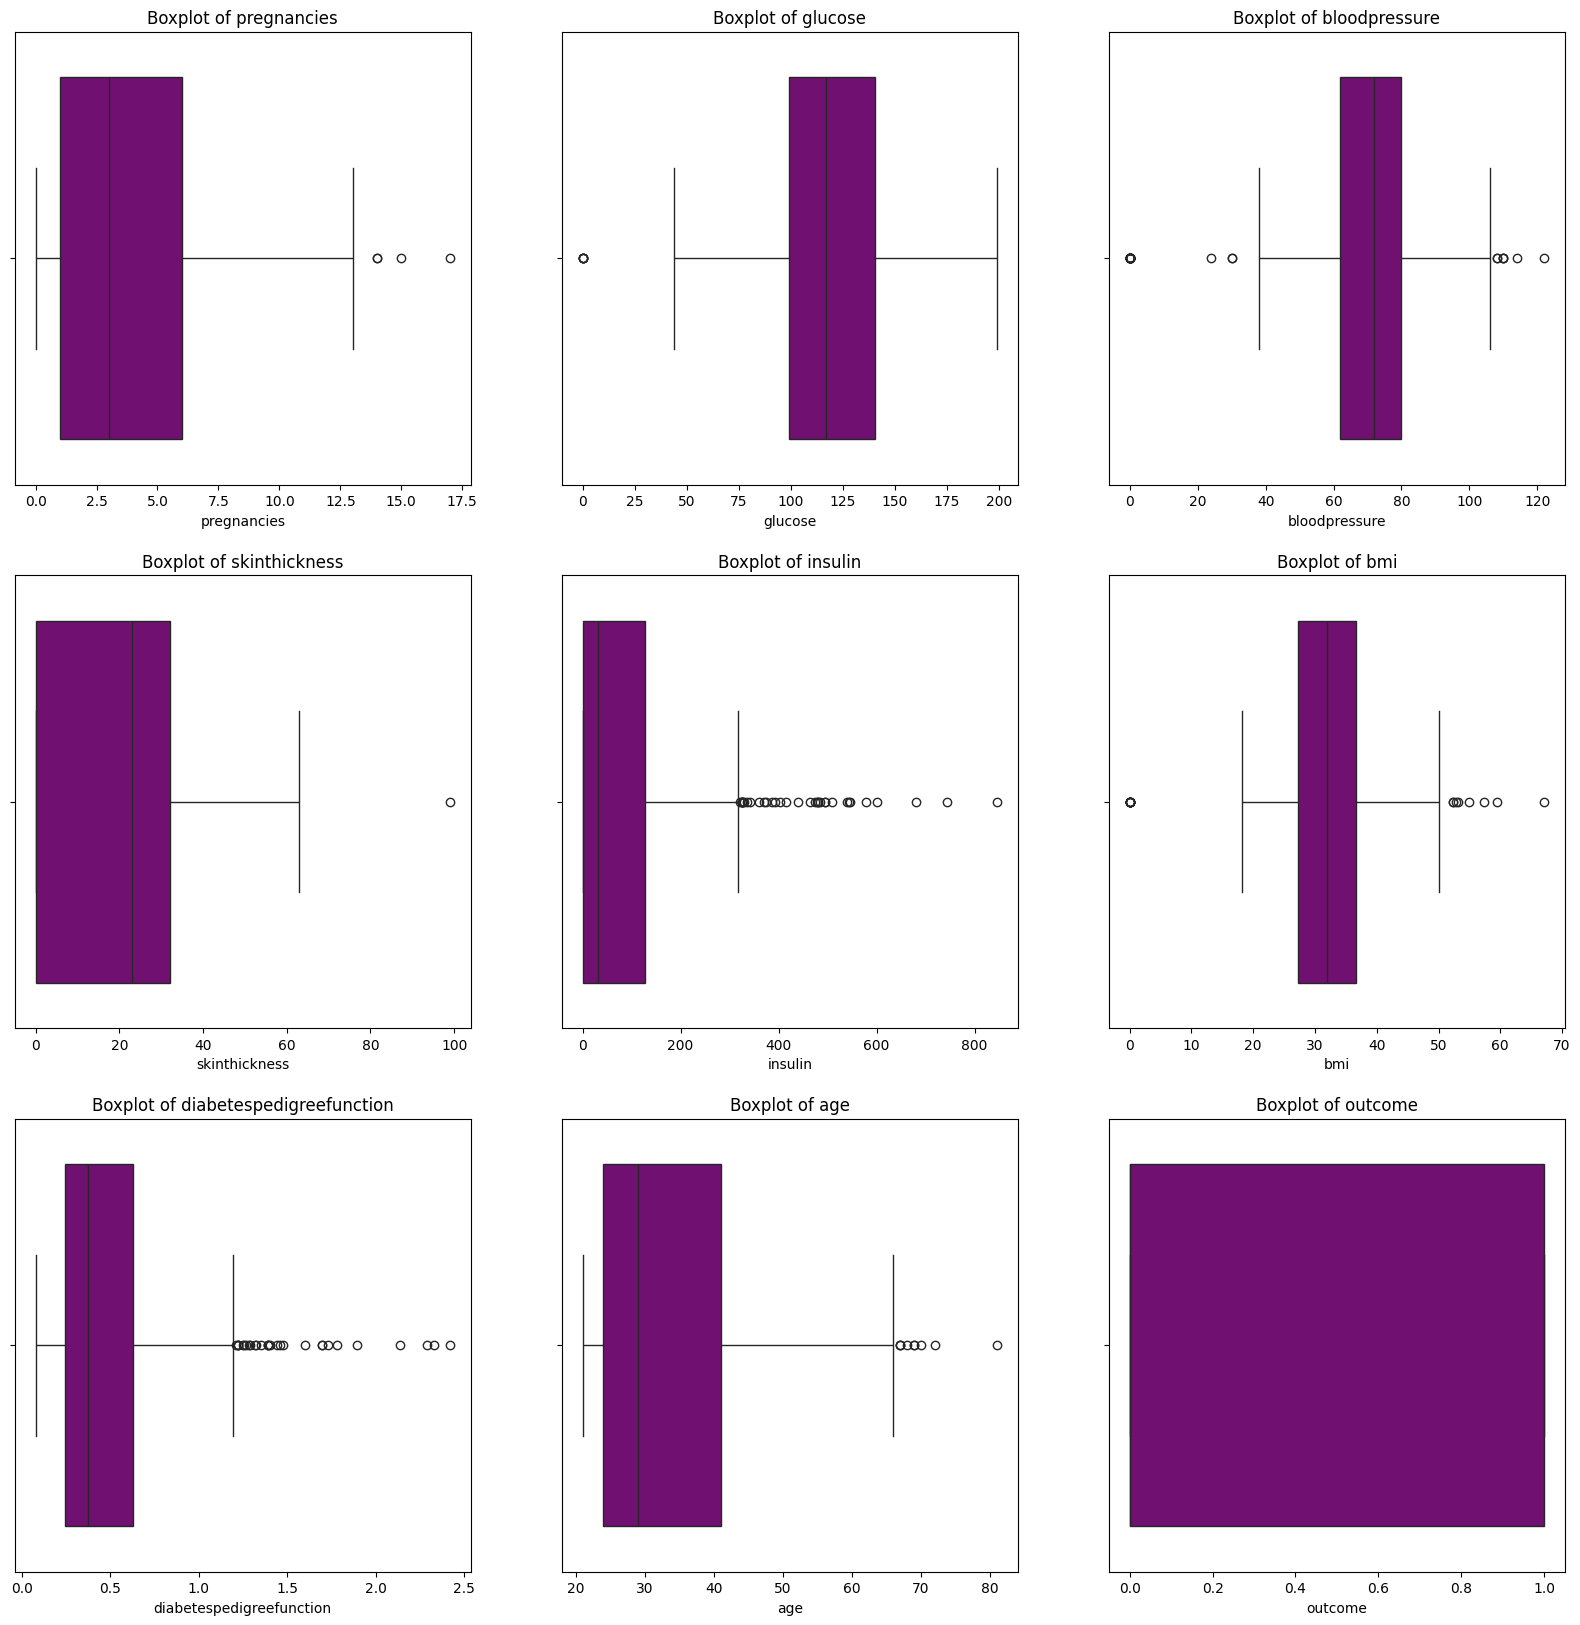

In [9]:
# Outlier Using Box Plot

plt.figure(figsize=(20, 20))
# Identifying and handling outliers
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data = df, x = col, color = 'purple')
    plt.title(f'Boxplot of {col}')
plt.show()

In [10]:
# Detecting Outliers using Z-Score
from scipy.stats import zscore


z_scores = zscore(df)
outliers = (np.abs(z_scores) > 3)
outliers.sum()

pregnancies                  4
glucose                      5
bloodpressure               35
skinthickness                1
insulin                     18
bmi                         14
diabetespedigreefunction    11
age                          5
outcome                      0
dtype: int64

In [11]:
# detecting outliers using IQR method

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.85)
IQR = Q3 - Q1

higher_fence = Q3+1.5*IQR
lower_fence = Q1-1.5*IQR

((df < lower_fence) | (df > higher_fence)).sum()

pregnancies                  0
glucose                      5
bloodpressure               37
skinthickness                1
insulin                     17
bmi                         14
diabetespedigreefunction    10
age                          1
outcome                      0
dtype: int64

In [12]:
df.shape

(768, 9)

In [13]:
from scipy.stats.mstats import winsorize
winsored_df = df.apply(lambda x: winsorize(x, limits = 0.05))

winsored_df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,181,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,1.136,33,1


In [14]:
z_scores = zscore(winsored_df)
outliers = (np.abs(z_scores) > 3)
outliers.sum()

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64

In [15]:
winsored_df.shape

(768, 9)

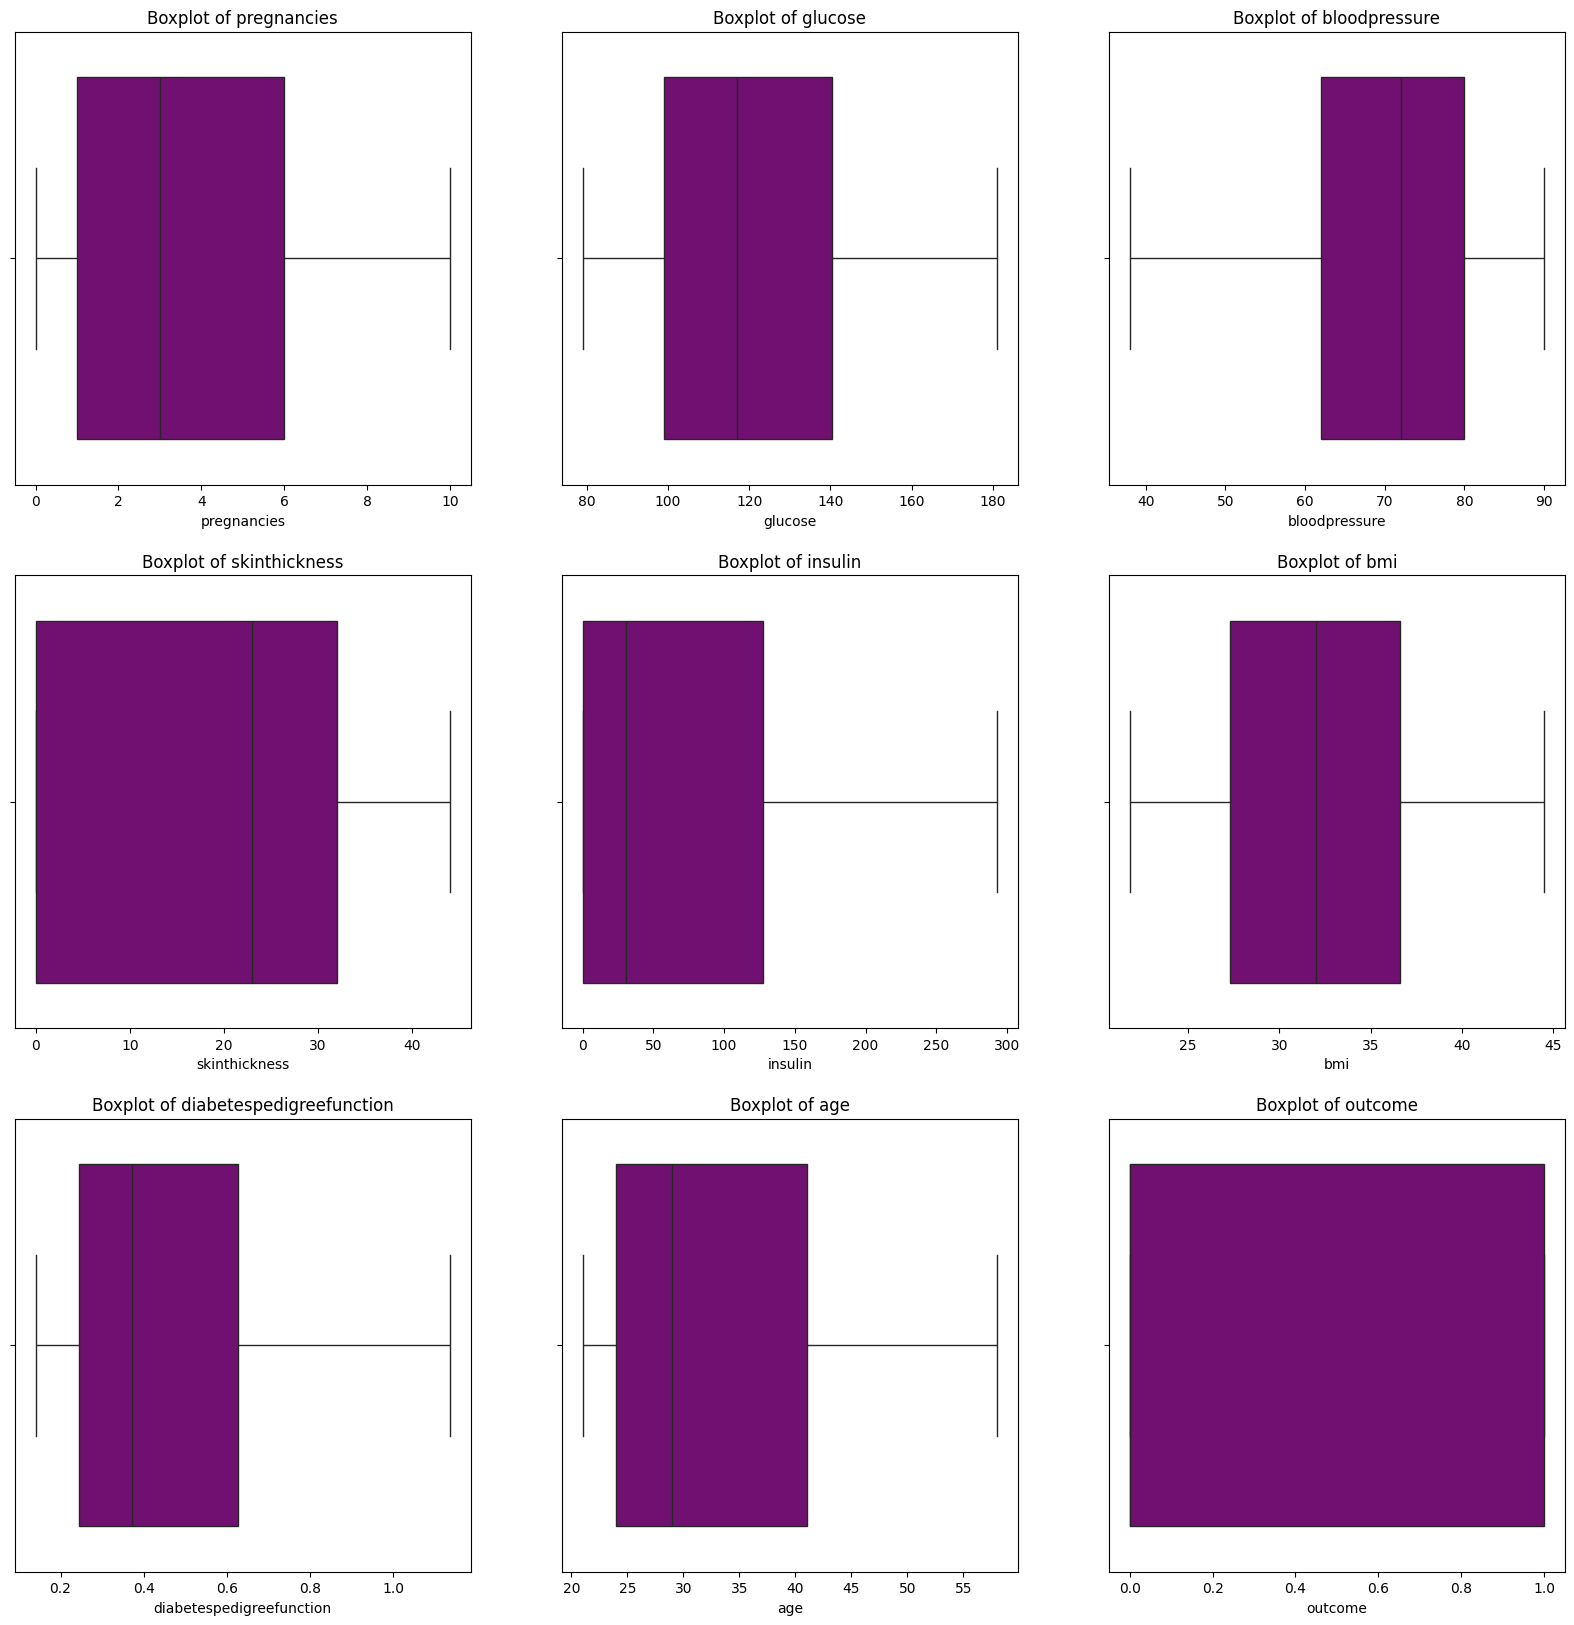

In [16]:
# Outlier Using Box Plot

plt.figure(figsize=(20, 20))
# Identifying and handling outliers
for i, col in enumerate(winsored_df.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data = df, x = col, color = 'purple')
    plt.title(f'Boxplot of {col}')
plt.show()

In [17]:
df = winsored_df.copy()
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,181,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,1.136,33,1


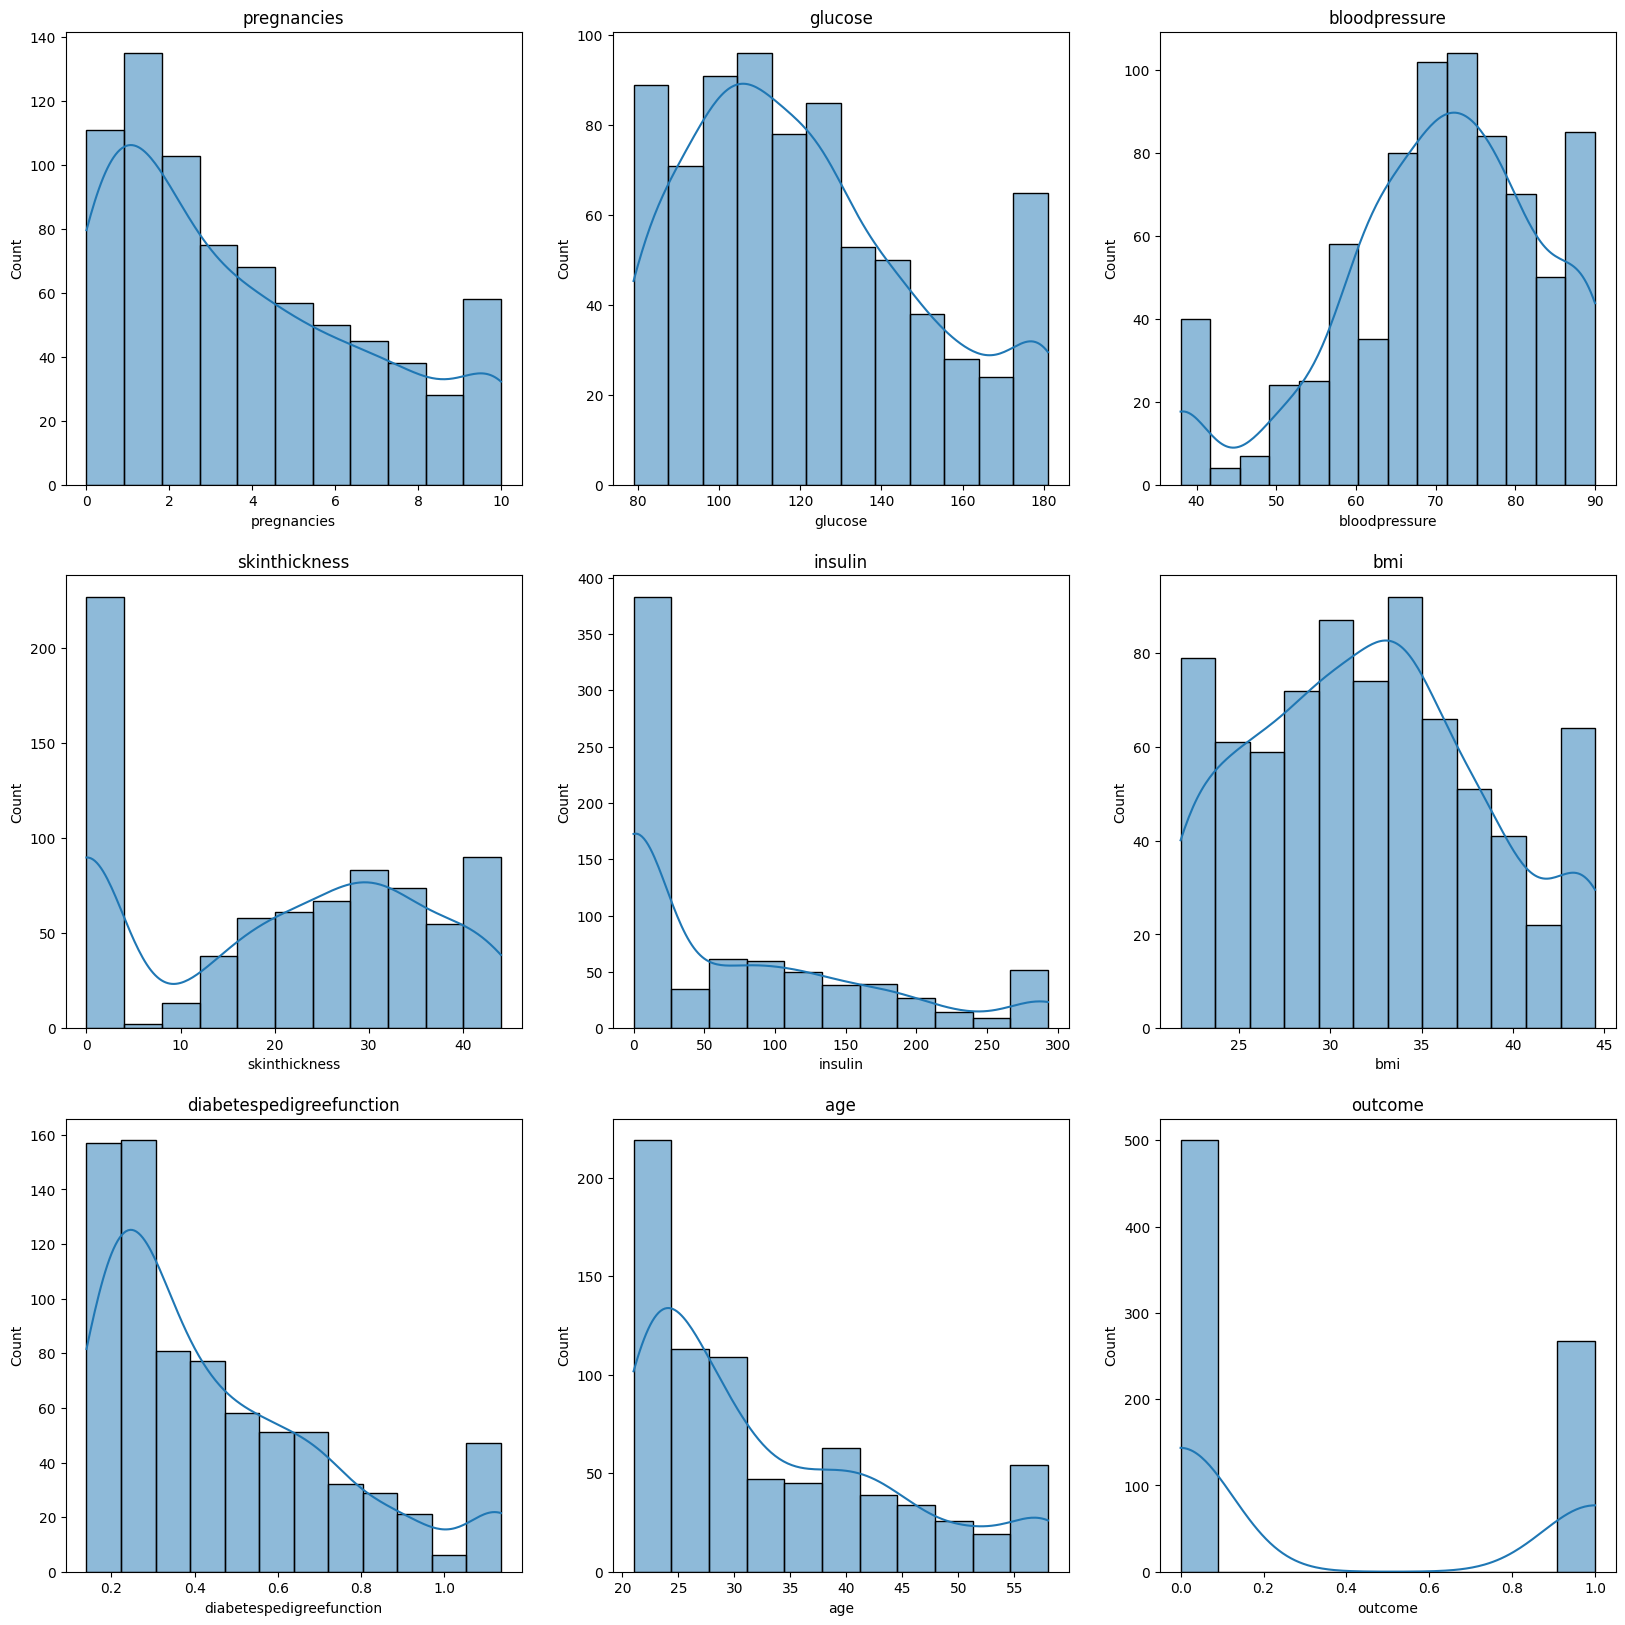

In [18]:
# Plotting the distribution of the data
plt.figure(figsize=(20, 20)) # taking a canvas of 20*20 pixels
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i+1) # vertical 3 and horizontal 3
    sns.histplot(df[col], kde=True)
    plt.title(col)

In [19]:
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,181,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,1.136,33,1


In [20]:
"""
outcome = -1 to 1
Interpretation: 
1: Perfect Linear Correlation
0: No Linear Correlation
-1: Perfect Negative Linear Correlation




correlation = 0.45

p-value <0.001: strong evidence against the null hypothesis, so you reject the null hypothesis.
p-value <0.05: moderate evidence against the null hypothesis, so you reject the null hypothesis.
p-value <0.1: weak evidence against the null hypothesis, so you fail to reject the null hypothesis.
p-value >0.1: no evidence against the null hypothesis, significant
"""



'\noutcome = -1 to 1\nInterpretation: \n1: Perfect Linear Correlation\n0: No Linear Correlation\n-1: Perfect Negative Linear Correlation\n\n\n\n\ncorrelation = 0.45\n\np-value <0.001: strong evidence against the null hypothesis, so you reject the null hypothesis.\np-value <0.05: moderate evidence against the null hypothesis, so you reject the null hypothesis.\np-value <0.1: weak evidence against the null hypothesis, so you fail to reject the null hypothesis.\np-value >0.1: no evidence against the null hypothesis, significant\n'

In [21]:
from scipy import stats

pearson_coef_val = []
p_val = []
for i in df.columns:
    pearson_coef, p_value = stats.pearsonr(df[i], df['outcome'])
    pearson_coef_val.append(pearson_coef)
    p_val.append(round(p_value, 4))

In [22]:
is_significant = ["yes" if i < 0.05 else "no" for i in p_val]

In [23]:
corr_df = pd.DataFrame({'Column': df.columns, 'Correlation': pearson_coef_val, 'P-Value': p_val, 'Is Significant': is_significant})
corr_df

,Column,Correlation,P-Value,Is Significant
0,pregnancies,0.219720,0.0000,yes
1,glucose,0.491462,0.0000,yes
2,bloodpressure,0.113609,0.0016,yes
3,skinthickness,0.067962,0.0598,no
4,insulin,0.122785,0.0006,yes
5,bmi,0.311371,0.0000,yes
6,diabetespedigreefunction,0.183589,0.0000,yes
7,age,0.260498,0.0000,yes
8,outcome,1.000000,0.0000,yes


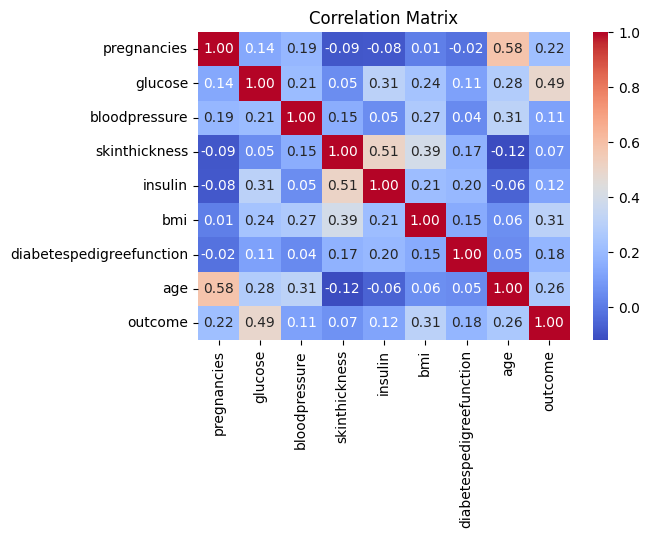

In [24]:
corr_matrix = df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

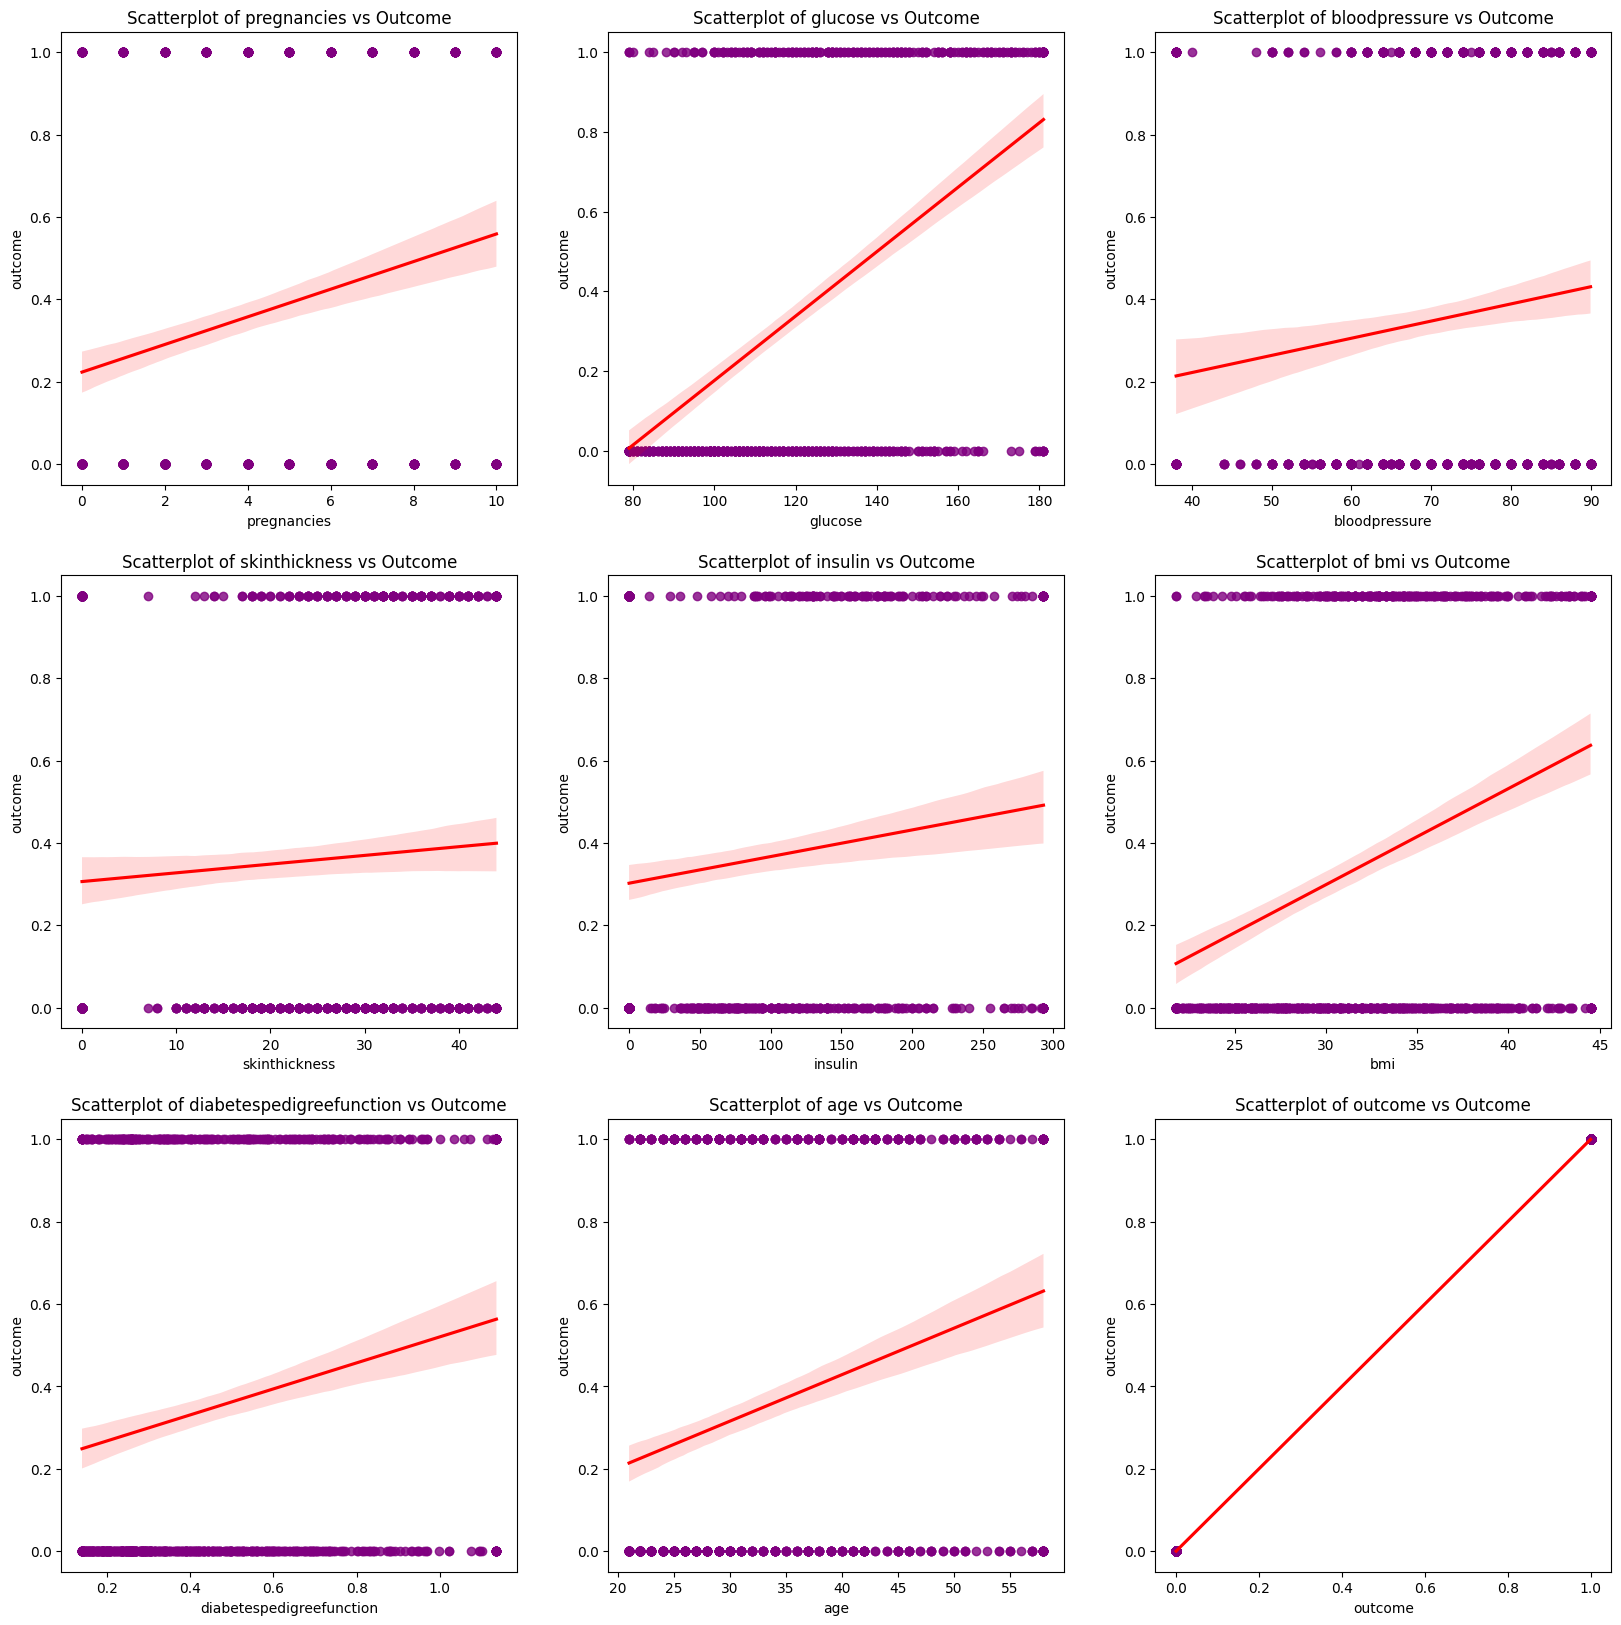

In [25]:
plt.figure(figsize=(20, 20))

for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    sns.regplot(data = df, x = col, y = 'outcome', color = 'purple', line_kws={'color': 'red'})
    plt.title(f'Scatterplot of {col} vs Outcome')
plt.show()


In [26]:
df.drop(columns = 'skinthickness', axis = 1, inplace = True)
df.head()

,pregnancies,glucose,bloodpressure,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,181,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,1.136,33,1


In [27]:
import copy
data = copy.deepcopy(df)
data.head()

,pregnancies,glucose,bloodpressure,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,181,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,1.136,33,1


In [28]:
data.dtypes

pregnancies                   int64
glucose                       int64
bloodpressure                 int64
insulin                       int64
bmi                         float64
diabetespedigreefunction    float64
age                           int64
outcome                       int64
dtype: object

In [29]:
# Data Modeling

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data.drop(columns = 'outcome', axis = 1)
y = data['outcome']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


In [30]:
# Scalling the data

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [31]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7272727272727273


In [32]:
# logistic regression, knn = logistic regression (winner)



### KNN Hyperparameter Tuning

In [39]:
knn_model = KNeighborsClassifier()

parameters = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'weights': ['uniform', 'distance']}

In [64]:
from sklearn.model_selection import GridSearchCV

knn_grid = GridSearchCV(knn_model, param_grid=parameters, cv=15)

knn_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=15, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']})

In [65]:
best_knn_model = knn_grid.best_estimator_
print("KNN - Hyperparameters optimization")

print("Best Parameters: ", knn_grid.best_params_)
print("Best Score: ", knn_grid.best_score_)
print("Best Estimator: ", knn_grid.best_estimator_)

KNN - Hyperparameters optimization
Best Parameters:  {'n_neighbors': 15, 'weights': 'uniform'}
Best Score:  0.765569105691057
Best Estimator:  KNeighborsClassifier(n_neighbors=15)


In [46]:
# model = KNeighborsClassifier(n_neighbors=9)
# model.fit(X_train_scaled, y_train)

# y_pred = model.predict(X_test_scaled)

# accuracy = accuracy_score(y_test, y_pred)
# print('Accuracy:', accuracy)

Accuracy: 0.7077922077922078


In [69]:
score = best_knn_model.score(X_test_scaled, y_test)
score

0.7012987012987013

In [73]:
# redwine dataset


data.to_csv('/home/alpha/2410/2410-machine-learning/data/diabetes_cleaned.csv', index=False)